In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
from scipy.stats import norm
from matplotlib import rcParams

In [2]:
df = pd.read_csv("filipino_family_expenditure.csv")

In [3]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


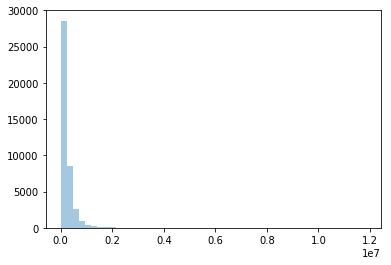

In [4]:
sns.distplot(list(df["Total Household Income"]), kde=False)
plt.show()

We observe an extrememly right-skewed graph. Hence the data must be normalized before it analysis can be done.

In [5]:
data = {}
for i, inc in enumerate(df["Total Household Income"]):
    if (df["Region"][i] not in data):
        data[df["Region"][i]] = []
    
    data[df["Region"][i]].append(inc)

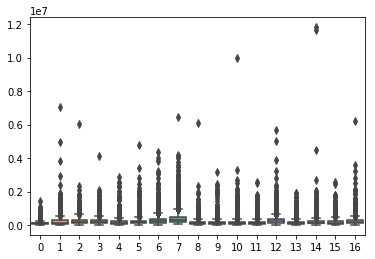

In [6]:
data2 = [data[i] for i in set(df["Region"])]
sns.boxplot(data=data2)
plt.show()

The boxplots also contain many outliers which we will filter out, by creating two categories of income, middle income (all data points present within the whiskers of the box plot} and high income (outliers).

## Classifying Income Groups

In [7]:
a = df["Total Household Income"].describe()
IQR = a[6] - a[4]
middle_income = []
outliers = []

for i in df["Total Household Income"]:
    lower_whisker = (a[4] - IQR*1.5)
    upper_whisker = (a[6] + IQR*1.5)
    if  lower_whisker <= i <= upper_whisker:
        middle_income.append(i)
    elif i >= upper_whisker:
        outliers.append(i)

In [8]:
len(df["Total Household Income"]) == len(middle_income) + len(outliers)

True

Therefore, our categories represent all data points.

In [9]:
list(df.columns)

['Total Household Income',
 'Region',
 'Total Food Expenditure',
 'Main Source of Income',
 'Agricultural Household indicator',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Imputed House Rental Value',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure',
 'Crop Farming and Gardening expenses',
 'Total Income from Entrepreneurial Acitivites',
 'Household Head Sex',
 'Household Head Age',
 'Household Head Marital Status',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Household Head Occupat

In [10]:
male_head_count=0
female_head_count=0
male_head_unemployed_count = 0
female_head_unemployed_count = 0

for i in range(len(df)):
    if df["Household Head Sex"][i]=="Male":
        male_head_count+=1
        if df["Household Head Job or Business Indicator"][i]=='No Job/Business':
            male_head_unemployed_count += 1
    if df["Household Head Sex"][i]=="Female":
        female_head_count+=1
        if df["Household Head Job or Business Indicator"][i]=='No Job/Business':
            female_head_unemployed_count += 1

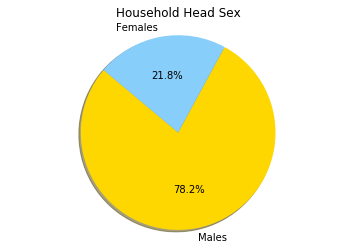

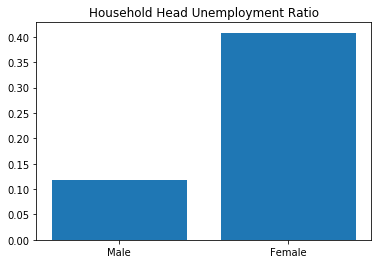

In [11]:
labels = "Males","Females"
sizes = [male_head_count,female_head_count]
colors = ['gold','lightskyblue']
explode=(0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Household Head Sex")
plt.axis('equal')
plt.show()

plt.bar(["Male","Female"], height=[male_head_unemployed_count/male_head_count, female_head_unemployed_count/female_head_count])
plt.title("Household Head Unemployment Ratio")
plt.show()


## Plotting Average Income

In [12]:
grades = df["Household Head Highest Grade Completed"]
incomes = df["Total Household Income"]
job_incomes = dict.fromkeys(set(df["Household Head Highest Grade Completed"]))

for i in job_incomes:
    job_incomes[i] = []
    
for i in range(len(df)):
    job_incomes[grades[i]].append(incomes[i])

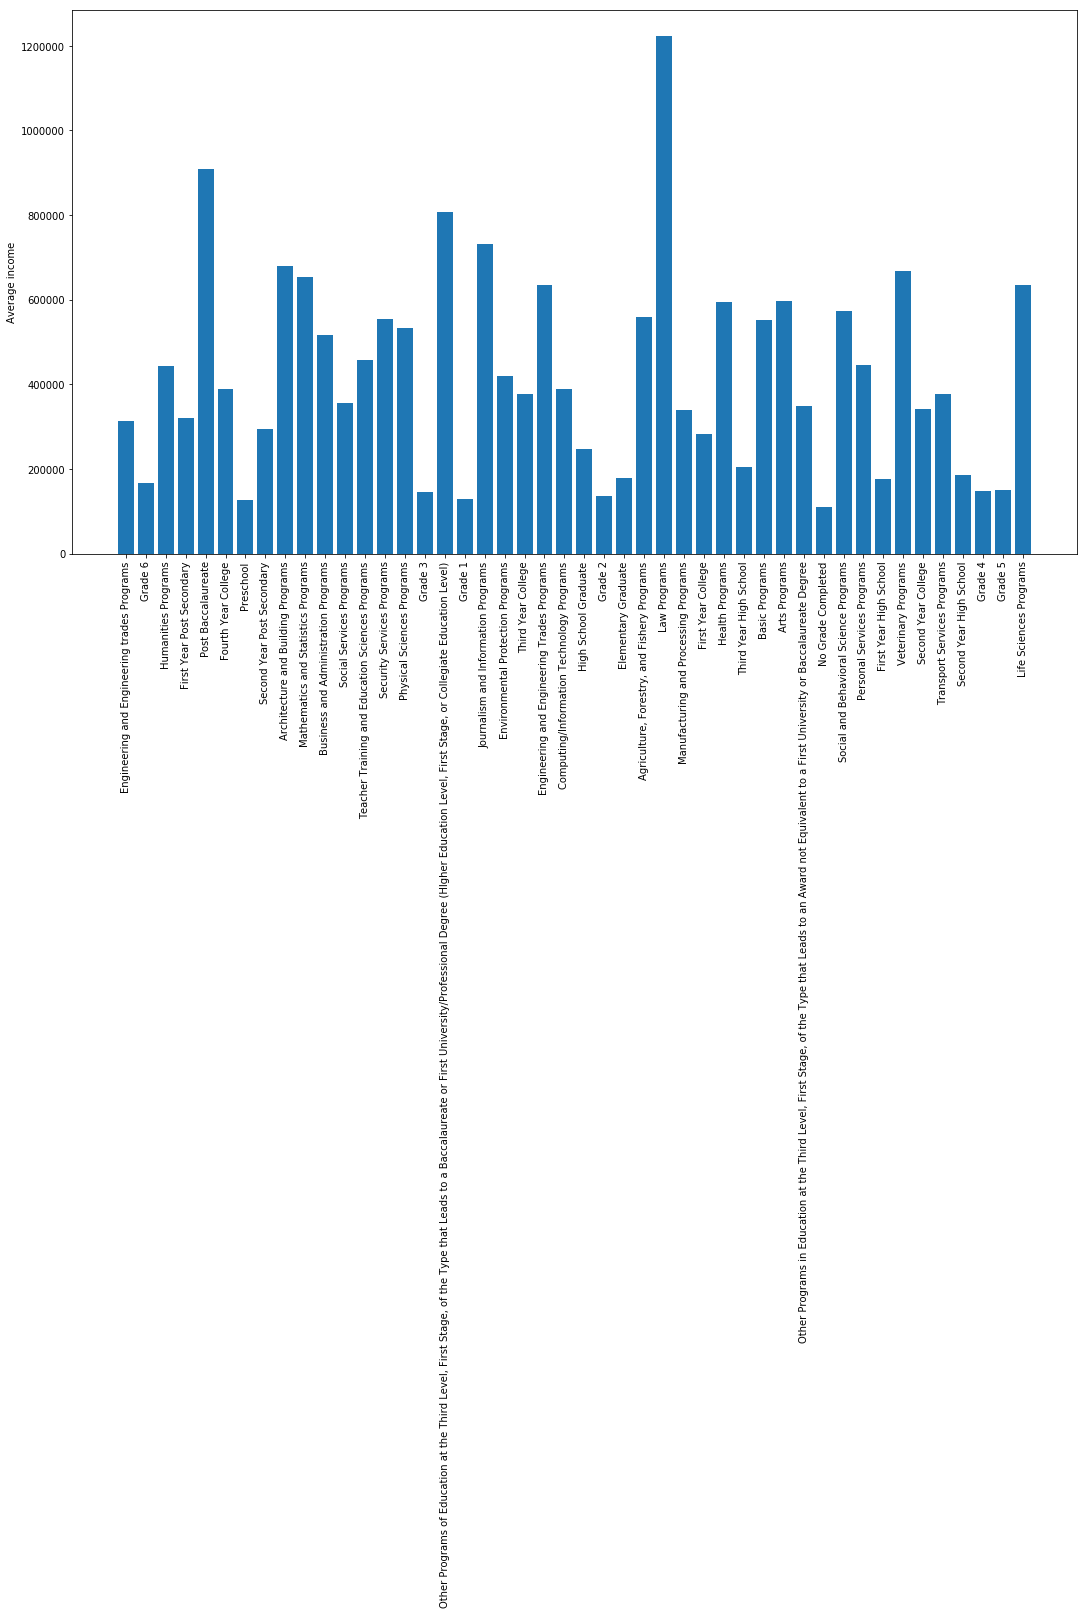

In [13]:
# Increasing the size of the plot.
rcParams['figure.figsize'] = [18, 10]

avg_incomes = [np.mean(i) for i in job_incomes.values()]
plt.xticks(rotation='vertical')
plt.bar(x=job_incomes.keys(), height=avg_incomes)
plt.ylabel("Average income")
plt.show()

Therefore , we observe that people who have studied law programs have the highest average salary of about 12,00,000 followed by post-Baccalaureate. 
People with no grade completed have the lowest average income followed by preschool and grade 1 and hence we can say that better the education , higher the income

# Variation of income with region:

In [14]:
region=df["Region"]
incomes=df["Total Household Income"]
region_incomes = dict.fromkeys(set(df["Region"]))

for i in region_incomes:
    region_incomes[i] = []
    
for i in range(len(df)):
    region_incomes[region[i]].append(incomes[i])

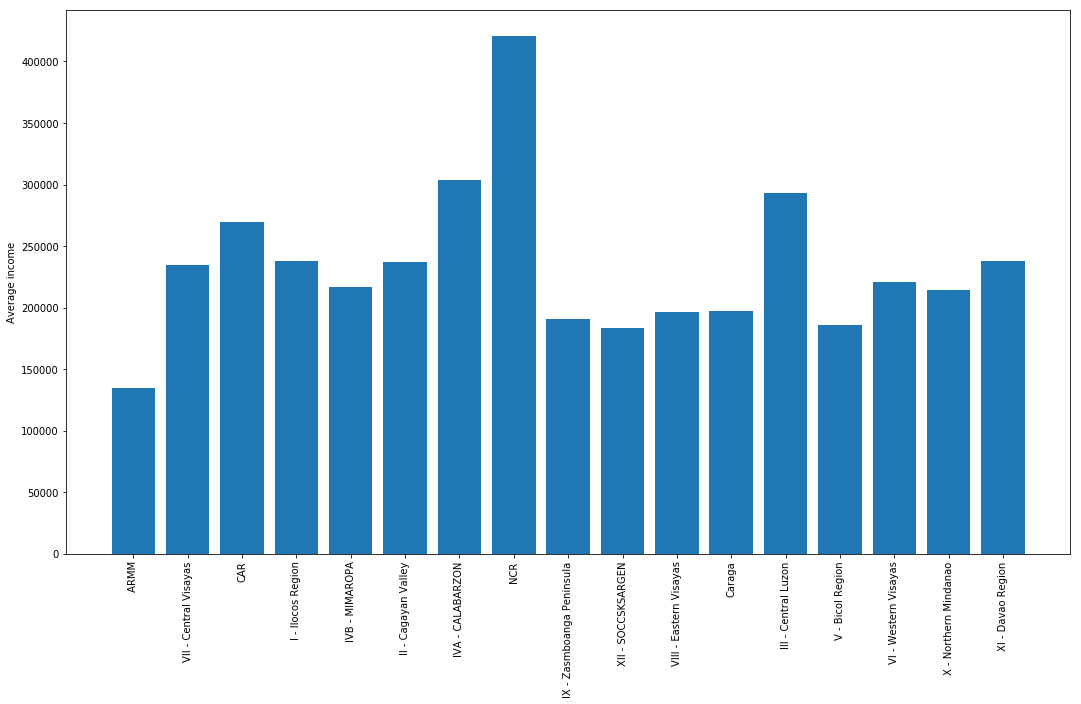

In [15]:
rcParams['figure.figsize'] = [18, 10]

avg_incomes = [np.mean(i) for i in region_incomes.values()]
plt.xticks(rotation='vertical')
plt.bar(x=region_incomes.keys(), height=avg_incomes)
plt.ylabel("Average income")
plt.show()

We observe people staying in NCR region have the highest value of average income of about 4,00,000. NCR region is the capital region and the population is higher compared to other cities. This graph shows that NCR is the richest region of all ,followed by CALABARZON region

# The rich and poor

In [16]:
income=[]
count=0
poor=[] #list of all incomes less than median
rich=[] #list of all incomes greater than meadian
for i in df["Total Household Income"]:
    income.append(i)
income.sort()

for i in income:
    count+=1
median=income[int(count/2)]+income[int((count/2)+1)]
print("Median income is:",median)

for i in df["Total Household Income"]:
    if i<median:
        poor.append(i)
    else:
        rich.append(i)

Median income is: 328164


In [55]:
a=[]
Other_Sources_of_Income=0
Enterprenurial_Activites=0
Wage_Salaries=0

for i in range(len(df["Main Source of Income"])):
    if df["Total Household Income"][i] > median:
        a.append(df["Main Source of Income"][i])
#print(a)
b=set(a)
print(b)

for i in range(len(a)):
        if(a[i]=="Other sources of Income"):
            Other_Sources_of_Income+=1
        elif (a[i]=="Enterpreneurial Activities"):
            Enterprenurial_Activites+=1
        elif(a[i]=="Wage/Salaries"):
            Wage_Salaries+=1
            
print("Number of rich people with source of income as other sources of income: ",Other_Sources_of_Income)
print("Number of rich people with source of income as Enterpreneurial_Activites: ",Enterprenurial_Activites)
print("Number of rich people with source of income as Wage/salaries: ",Wage_Salaries)

# Ashish,when we print(a) , we get what all the rich ppl source of income. that is Other_Sources_of_Income,Enterprenurial_Activites ,
#Wage_Salaries . i want to find the count of rich ppl who have souce of income as each of the above, so that we can conclude
# eg. 50 rich ppl have source of income as Enterprenurial activites.

#Do the same with poor ppl


{'Other sources of Income', 'Enterpreneurial Activities', 'Wage/Salaries'}
Number of rich people with source of income as other sources of income:  2292
Number of rich people with source of income as Enterpreneurial_Activites:  1364
Number of rich people with source of income as Wage/salaries:  5039


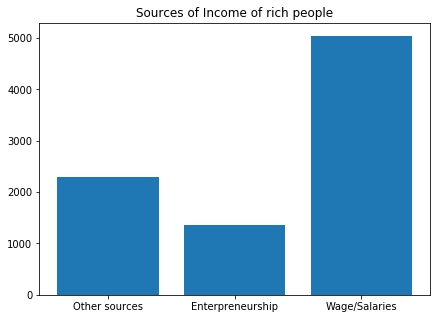

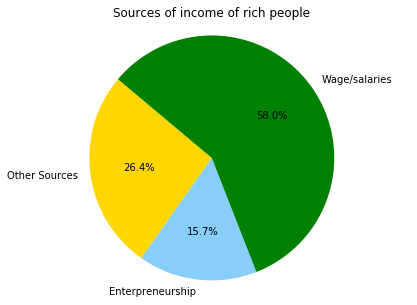

In [56]:
rcParams['figure.figsize'] = [7,5]
plt.bar(["Other sources","Enterpreneurship","Wage/Salaries"], height=[Other_Sources_of_Income,Enterprenurial_Activites,Wage_Salaries])
plt.title("Sources of Income of rich people")
plt.show()

labels = "Other Sources","Enterpreneurship","Wage/salaries"
sizes = [Other_Sources_of_Income,Enterprenurial_Activites,Wage_Salaries]
colors = ['gold','lightskyblue','green']
explode=(0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Sources of income of rich people")
plt.axis('equal')
plt.show()


Therefore most of the rich people have their main source of income as Wage/ Salaries. Least Number of rich people are Enterpreneurs. People tend to go for safer options maybe because the government isn't supportive for Enterpreneurship.

In [57]:
a=[]
Other_Sources_of_Income=0
Enterprenurial_Activites=0
Wage_Salaries=0

for i in range(len(df["Main Source of Income"])):
    if df["Total Household Income"][i] <= median:
        a.append(df["Main Source of Income"][i])
#print(a)
b=set(a)
print(b)

for i in range(len(a)):
        if(a[i]=="Other sources of Income"):
            Other_Sources_of_Income+=1
        elif (a[i]=="Enterpreneurial Activities"):
            Enterprenurial_Activites+=1
        elif(a[i]=="Wage/Salaries"):
            Wage_Salaries+=1
            
print("Number of poor people with source of income as other sources of income: ",Other_Sources_of_Income)
print("Number of poor people with source of income as Enterpreneurial_Activites: ",Enterprenurial_Activites)
print("Number of poor people with source of income as Wage/salaries: ",Wage_Salaries)


{'Enterpreneurial Activities', 'Other sources of Income', 'Wage/Salaries'}
Number of poor people with source of income as other sources of income:  8544
Number of poor people with source of income as Enterpreneurial_Activites:  8956
Number of poor people with source of income as Wage/salaries:  15349


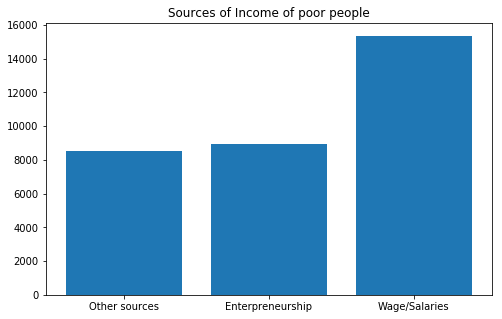

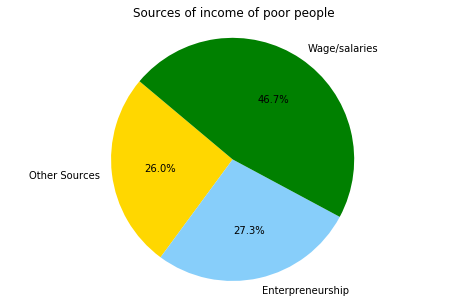

In [61]:
rcParams['figure.figsize'] = [8,5]
plt.bar(["Other sources","Enterpreneurship","Wage/Salaries"], height=[Other_Sources_of_Income,Enterprenurial_Activites,Wage_Salaries])
plt.title("Sources of Income of poor people")
plt.show()

labels = "Other Sources","Enterpreneurship","Wage/salaries"
sizes = [Other_Sources_of_Income,Enterprenurial_Activites,Wage_Salaries]
colors = ['gold','lightskyblue','green']
explode=(0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Sources of income of poor people")
plt.axis('equal')
plt.show()